## Tensorflow란?

- 머신러닝을 위한 오픈소스 플랫폼 - 딥러닝 프레임워크
- 구글이 주도적으로 개발 - 구글 코랩에는 기본 장착
- 최근 2.x 버전이 발표
- Keras라고 하는 고수준 API를 병합
- Tensor: 벡터나 행렬을 의미
- Graph: 텐서가 흐르는 경로(혹은 공간)
- Tensor Flow: 텐서가 Graph를 통해 흐른다

## 딥러닝의 기초 feat.Keras

- 신경망에서 아이디어를 얻어서 시작된 Neural Net
- 입력 layer -> 히든 layer -> 출력 layer
- 뉴런
    - 뉴런은 입력, 가중치, 활성화함수, 출력으로 구성
    - 뉴런에서 학습할 때 변하는 것은 가중치, 처음에는 초기화를 통해 랜덤값을 넣고,
    - 학습과정에서 일정한 값으로 수렴
- 레이어와 망(net)
    - 뉴런이 모여서 layer를 구성하고, 망(net)이 됨.
- 딥러닝
    - 신경망이 깊어(많아)지면 깊은 신경망 Deep Learning이 됨.

## 간단한 데이터 

In [1]:
import numpy as np

raw_data = np.genfromtxt('https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/x09.txt',
                        skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

### 어떻게 생겼나?

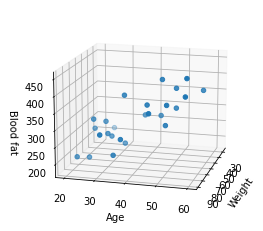

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

### 현재 간단한 딥러닝의 목표

- 이 예제의 목적은 입력인 나이와 몸무게를 알려주면, 주어진 데이터 기준의 blood fat을 얻는 것이다.
- 즉, 40살, 100kg인 사람의 데이터 기준 blood fat은?하고 물으면, 얼마입니다~~하고 답이 나와야 하는 것이다.
- Linear Regression

### 먼저 모델을 주어진 데이터로 얻는 것

- $y= xW + b$
- 직선 모델을 얻는 것으로 하면, 주어진 입출력 데이터로 W와 b 즉, 모델을 얻는 것

### 현재 우리의 목표

- 목적: x1, x2를 입력해서 y가 나오게 하는 Weight와 bias를 구하는 것

### 학습 대상 데이터를 추림

In [5]:
x_data = np.array(raw_data[:,2:4], dtype=np.float32)
y_data = np.array(raw_data[:,4], dtype=np.float32)

y_data = y_data.reshape((25, 1))

### 원래 의도한 모델을 만듬

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2, )),
]) # 출력이 1, 입력이 2

model.compile(optimizer='rmsprop', loss='mse')

### loss

- 학습을 위해서는 loss(cost)함수를 정해주어야 한다
- loss 함수는 간략히 말해서, 정답까지 얼마나 멀리 있는지를 측정하는 함수이다.
- 이번에는 mse:mean square error 오차 제곱의 평균을 사용
- 그리고, 옵티마이저를 선정한다.
- 옵티마이저는 loss를 어떻게 줄일 것인지를 결정하는 방법을 선택하는 것이다.

### optimizer

- optimizer는 loss함수를 최소화하는 가중치를 찾아가는 과정에 대한 알고리즘이다.
- 여기서는 rmsprop를 사용

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


- w1, w2, b를 찾아야한다.

### 다음할 과정

- 현재 우리는 나이와 몸무게를 받아서 Blood fat을 추정하는 모델을 학습을 통해 얻으려고 한다.
- 이를 위해
    - 모델(네트워크)을 구성했고
    - 모델의 loss function을 선정하고, loss의 감소를 위한 optimizer도 선정을 했다.
- 이제 학습을 시작

### fit 학습

In [11]:
hist = model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 183ms/step - loss: 73615.4062
Epoch 2/5000
1/1 [==============================] - 0s 2ms/step - loss: 73431.8359
Epoch 3/5000
1/1 [==============================] - 0s 1ms/step - loss: 73298.8984
Epoch 4/5000
1/1 [==============================] - 0s 2ms/step - loss: 73187.7344
Epoch 5/5000
1/1 [==============================] - 0s 2ms/step - loss: 73089.1484
Epoch 6/5000
1/1 [==============================] - 0s 2ms/step - loss: 72998.8984
Epoch 7/5000
1/1 [==============================] - 0s 2ms/step - loss: 72914.5859
Epoch 8/5000
1/1 [==============================] - 0s 1000us/step - loss: 72834.7422
Epoch 9/5000
1/1 [==============================] - 0s 2ms/step - loss: 72758.3906
Epoch 10/5000
1/1 [==============================] - 0s 2ms/step - loss: 72684.8203
Epoch 11/5000
1/1 [==============================] - 0s 2ms/step - loss: 72613.5078
Epoch 12/5000
1/1 [==============================] - 0s 1000us/step - loss: 7254

1/1 [==============================] - 0s 1000us/step - loss: 62517.2109
Epoch 193/5000
1/1 [==============================] - 0s 987us/step - loss: 62464.2188
Epoch 194/5000
1/1 [==============================] - 0s 999us/step - loss: 62411.2617
Epoch 195/5000
1/1 [==============================] - 0s 1ms/step - loss: 62358.3203
Epoch 196/5000
1/1 [==============================] - 0s 1ms/step - loss: 62305.4102
Epoch 197/5000
1/1 [==============================] - 0s 989us/step - loss: 62252.5156
Epoch 198/5000
1/1 [==============================] - 0s 1ms/step - loss: 62199.6602
Epoch 199/5000
1/1 [==============================] - 0s 990us/step - loss: 62146.8164
Epoch 200/5000
1/1 [==============================] - 0s 2ms/step - loss: 62094.0000
Epoch 201/5000
1/1 [==============================] - 0s 1ms/step - loss: 62041.2031
Epoch 202/5000
1/1 [==============================] - 0s 2ms/step - loss: 61988.4414
Epoch 203/5000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 52886.1914
Epoch 383/5000
1/1 [==============================] - 0s 1000us/step - loss: 52837.8203
Epoch 384/5000
1/1 [==============================] - 0s 999us/step - loss: 52789.4766
Epoch 385/5000
1/1 [==============================] - 0s 2ms/step - loss: 52741.1484
Epoch 386/5000
1/1 [==============================] - 0s 1ms/step - loss: 52692.8594
Epoch 387/5000
1/1 [==============================] - 0s 999us/step - loss: 52644.5898
Epoch 388/5000
1/1 [==============================] - 0s 1000us/step - loss: 52596.3398
Epoch 389/5000
1/1 [==============================] - 0s 1000us/step - loss: 52548.1211
Epoch 390/5000
1/1 [==============================] - 0s 1ms/step - loss: 52499.9141
Epoch 391/5000
1/1 [==============================] - 0s 989us/step - loss: 52451.7383
Epoch 392/5000
1/1 [==============================] - 0s 1000us/step - loss: 52403.6016
Epoch 393/5000
1/1 [==============================] - 0s 999us

1/1 [==============================] - 0s 999us/step - loss: 48399.7500
Epoch 478/5000
1/1 [==============================] - 0s 988us/step - loss: 48353.6914
Epoch 479/5000
1/1 [==============================] - 0s 999us/step - loss: 48307.6562
Epoch 480/5000
1/1 [==============================] - 0s 1ms/step - loss: 48261.6406
Epoch 481/5000
1/1 [==============================] - 0s 988us/step - loss: 48215.6602
Epoch 482/5000
1/1 [==============================] - 0s 1ms/step - loss: 48169.6953
Epoch 483/5000
1/1 [==============================] - 0s 2ms/step - loss: 48123.7539
Epoch 484/5000
1/1 [==============================] - 0s 2ms/step - loss: 48077.8438
Epoch 485/5000
1/1 [==============================] - 0s 1ms/step - loss: 48031.9531
Epoch 486/5000
1/1 [==============================] - 0s 1000us/step - loss: 47986.0898
Epoch 487/5000
1/1 [==============================] - 0s 2ms/step - loss: 47940.2461
Epoch 488/5000
1/1 [==============================] - 0s 1000us/step 

Epoch 572/5000
1/1 [==============================] - 0s 1000us/step - loss: 44132.6250
Epoch 573/5000
1/1 [==============================] - 0s 1000us/step - loss: 44088.8750
Epoch 574/5000
1/1 [==============================] - 0s 995us/step - loss: 44045.1562
Epoch 575/5000
1/1 [==============================] - 0s 987us/step - loss: 44001.4453
Epoch 576/5000
1/1 [==============================] - 0s 1ms/step - loss: 43957.7656
Epoch 577/5000
1/1 [==============================] - 0s 1ms/step - loss: 43914.1133
Epoch 578/5000
1/1 [==============================] - 0s 1ms/step - loss: 43870.4805
Epoch 579/5000
1/1 [==============================] - 0s 1ms/step - loss: 43826.8711
Epoch 580/5000
1/1 [==============================] - 0s 2ms/step - loss: 43783.2969
Epoch 581/5000
1/1 [==============================] - 0s 1ms/step - loss: 43739.7383
Epoch 582/5000
1/1 [==============================] - 0s 1ms/step - loss: 43696.2031
Epoch 583/5000
1/1 [==============================] - 0

Epoch 667/5000
1/1 [==============================] - 0s 1ms/step - loss: 40084.7812
Epoch 668/5000
1/1 [==============================] - 0s 1ms/step - loss: 40043.3359
Epoch 669/5000
1/1 [==============================] - 0s 1000us/step - loss: 40001.9219
Epoch 670/5000
1/1 [==============================] - 0s 2ms/step - loss: 39960.5273
Epoch 671/5000
1/1 [==============================] - 0s 999us/step - loss: 39919.1602
Epoch 672/5000
1/1 [==============================] - 0s 983us/step - loss: 39877.8125
Epoch 673/5000
1/1 [==============================] - 0s 1ms/step - loss: 39836.4883
Epoch 674/5000
1/1 [==============================] - 0s 987us/step - loss: 39795.1914
Epoch 675/5000
1/1 [==============================] - 0s 1000us/step - loss: 39753.9219
Epoch 676/5000
1/1 [==============================] - 0s 1ms/step - loss: 39712.6719
Epoch 677/5000
1/1 [==============================] - 0s 2ms/step - loss: 39671.4492
Epoch 678/5000
1/1 [==============================] -

Epoch 762/5000
1/1 [==============================] - 0s 1ms/step - loss: 36256.1172
Epoch 763/5000
1/1 [==============================] - 0s 2ms/step - loss: 36216.9844
Epoch 764/5000
1/1 [==============================] - 0s 2ms/step - loss: 36177.8750
Epoch 765/5000
1/1 [==============================] - 0s 2ms/step - loss: 36138.7891
Epoch 766/5000
1/1 [==============================] - 0s 2ms/step - loss: 36099.7266
Epoch 767/5000
1/1 [==============================] - 0s 2ms/step - loss: 36060.6875
Epoch 768/5000
1/1 [==============================] - 0s 985us/step - loss: 36021.6758
Epoch 769/5000
1/1 [==============================] - 0s 988us/step - loss: 35982.6836
Epoch 770/5000
1/1 [==============================] - 0s 1000us/step - loss: 35943.7227
Epoch 771/5000
1/1 [==============================] - 0s 1ms/step - loss: 35904.7852
Epoch 772/5000
1/1 [==============================] - 0s 999us/step - loss: 35865.8633
Epoch 773/5000
1/1 [==============================] - 0s

1/1 [==============================] - 0s 2ms/step - loss: 32646.6172
Epoch 858/5000
1/1 [==============================] - 0s 1000us/step - loss: 32609.7832
Epoch 859/5000
1/1 [==============================] - 0s 2ms/step - loss: 32572.9766
Epoch 860/5000
1/1 [==============================] - 0s 1ms/step - loss: 32536.1953
Epoch 861/5000
1/1 [==============================] - 0s 1000us/step - loss: 32499.4355
Epoch 862/5000
1/1 [==============================] - 0s 1ms/step - loss: 32462.7031
Epoch 863/5000
1/1 [==============================] - 0s 2ms/step - loss: 32425.9922
Epoch 864/5000
1/1 [==============================] - 0s 989us/step - loss: 32389.3066
Epoch 865/5000
1/1 [==============================] - 0s 1ms/step - loss: 32352.6445
Epoch 866/5000
1/1 [==============================] - 0s 1000us/step - loss: 32316.0078
Epoch 867/5000
1/1 [==============================] - 0s 2ms/step - loss: 32279.3926
Epoch 868/5000
1/1 [==============================] - 0s 2ms/step - l

Epoch 953/5000
1/1 [==============================] - 0s 2ms/step - loss: 29221.6523
Epoch 954/5000
1/1 [==============================] - 0s 1000us/step - loss: 29187.1504
Epoch 955/5000
1/1 [==============================] - 0s 2ms/step - loss: 29152.6758
Epoch 956/5000
1/1 [==============================] - 0s 2ms/step - loss: 29118.2207
Epoch 957/5000
1/1 [==============================] - 0s 2ms/step - loss: 29083.7949
Epoch 958/5000
1/1 [==============================] - 0s 1000us/step - loss: 29049.3867
Epoch 959/5000
1/1 [==============================] - 0s 2ms/step - loss: 29015.0098
Epoch 960/5000
1/1 [==============================] - 0s 994us/step - loss: 28980.6582
Epoch 961/5000
1/1 [==============================] - 0s 2ms/step - loss: 28946.3281
Epoch 962/5000
1/1 [==============================] - 0s 2ms/step - loss: 28912.0195
Epoch 963/5000
1/1 [==============================] - 0s 2ms/step - loss: 28877.7383
Epoch 964/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 1000us/step - loss: 23162.0195
Epoch 1142/5000
1/1 [==============================] - 0s 1ms/step - loss: 23132.0801
Epoch 1143/5000
1/1 [==============================] - 0s 3ms/step - loss: 23102.1621
Epoch 1144/5000
1/1 [==============================] - 0s 2ms/step - loss: 23072.2695
Epoch 1145/5000
1/1 [==============================] - 0s 3ms/step - loss: 23042.3984
Epoch 1146/5000
1/1 [==============================] - 0s 3ms/step - loss: 23012.5527
Epoch 1147/5000
1/1 [==============================] - 0s 998us/step - loss: 22982.7324
Epoch 1148/5000
1/1 [==============================] - 0s 999us/step - loss: 22952.9355
Epoch 1149/5000
1/1 [==============================] - 0s 2ms/step - loss: 22923.1641
Epoch 1150/5000
1/1 [==============================] - 0s 2ms/step - loss: 22893.4102
Epoch 1151/5000
1/1 [==============================] - 0s 3ms/step - loss: 22863.6934
Epoch 1152/5000
1/1 [==============================] - 0s 1ms/s

1/1 [==============================] - 0s 1000us/step - loss: 17984.5039
Epoch 1329/5000
1/1 [==============================] - 0s 1ms/step - loss: 17959.0938
Epoch 1330/5000
1/1 [==============================] - 0s 999us/step - loss: 17933.7070
Epoch 1331/5000
1/1 [==============================] - 0s 1000us/step - loss: 17908.3418
Epoch 1332/5000
1/1 [==============================] - 0s 990us/step - loss: 17883.0039
Epoch 1333/5000
1/1 [==============================] - 0s 1ms/step - loss: 17857.6895
Epoch 1334/5000
1/1 [==============================] - 0s 1ms/step - loss: 17832.3984
Epoch 1335/5000
1/1 [==============================] - 0s 999us/step - loss: 17807.1328
Epoch 1336/5000
1/1 [==============================] - 0s 998us/step - loss: 17781.8906
Epoch 1337/5000
1/1 [==============================] - 0s 1ms/step - loss: 17756.6719
Epoch 1338/5000
1/1 [==============================] - 0s 1ms/step - loss: 17731.4766
Epoch 1339/5000
1/1 [==============================] - 0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 1849/5000
1/1 [==============================] - 0s 1000us/step - loss: 8018.2549
Epoch 1850/5000
1/1 [==============================] - 0s 2ms/step - loss: 8005.4150
Epoch 1851/5000
1/1 [==============================] - 0s 999us/step - loss: 7992.5977
Epoch 1852/5000
1/1 [==============================] - 0s 989us/step - loss: 7979.8042
Epoch 1853/5000
1/1 [==============================] - 0s 988us/step - loss: 7967.0361
Epoch 1854/5000
1/1 [==============================] - 0s 1000us/step - loss: 7954.2925
Epoch 1855/5000
1/1 [==============================] - 0s 988us/step - loss: 7941.5737
Epoch 1856/5000
1/1 [==============================] - 0s 1ms/step - loss: 7928.8770
Epoch 1857/5000
1/1 [==============================] - 0s 988us/step - loss: 7916.2031
Epoch 1858/5000
1/1 [==============================] - 0s 2ms/step - loss: 7903.5542
Epoch 1859/5000
1/1 [==============================] - 0s 2ms/step - loss: 7890.9302
Epoch 1860/5000
1/1 [============================

1/1 [==============================] - 0s 1ms/step - loss: 6905.4526
Epoch 1945/5000
1/1 [==============================] - 0s 2ms/step - loss: 6894.8887
Epoch 1946/5000
1/1 [==============================] - 0s 1ms/step - loss: 6884.3457
Epoch 1947/5000
1/1 [==============================] - 0s 2ms/step - loss: 6873.8301
Epoch 1948/5000
1/1 [==============================] - 0s 1ms/step - loss: 6863.3374
Epoch 1949/5000
1/1 [==============================] - 0s 1ms/step - loss: 6852.8691
Epoch 1950/5000
1/1 [==============================] - 0s 999us/step - loss: 6842.4248
Epoch 1951/5000
1/1 [==============================] - 0s 1ms/step - loss: 6832.0029
Epoch 1952/5000
1/1 [==============================] - 0s 988us/step - loss: 6821.6069
Epoch 1953/5000
1/1 [==============================] - 0s 1ms/step - loss: 6811.2339
Epoch 1954/5000
1/1 [==============================] - 0s 2ms/step - loss: 6800.8838
Epoch 1955/5000
1/1 [==============================] - 0s 1ms/step - loss: 67

1/1 [==============================] - 0s 1000us/step - loss: 5325.7505
Epoch 2135/5000
1/1 [==============================] - 0s 967us/step - loss: 5319.6982
Epoch 2136/5000
1/1 [==============================] - 0s 1ms/step - loss: 5313.6689
Epoch 2137/5000
1/1 [==============================] - 0s 1000us/step - loss: 5307.6626
Epoch 2138/5000
1/1 [==============================] - 0s 1ms/step - loss: 5301.6802
Epoch 2139/5000
1/1 [==============================] - 0s 996us/step - loss: 5295.7227
Epoch 2140/5000
1/1 [==============================] - 0s 2ms/step - loss: 5289.7876
Epoch 2141/5000
1/1 [==============================] - 0s 1000us/step - loss: 5283.8755
Epoch 2142/5000
1/1 [==============================] - 0s 999us/step - loss: 5277.9883
Epoch 2143/5000
1/1 [==============================] - 0s 1ms/step - loss: 5272.1235
Epoch 2144/5000
1/1 [==============================] - 0s 2ms/step - loss: 5266.2812
Epoch 2145/5000
1/1 [==============================] - 0s 982us/st

1/1 [==============================] - 0s 3ms/step - loss: 4589.4668
Epoch 2325/5000
1/1 [==============================] - 0s 1ms/step - loss: 4587.6909
Epoch 2326/5000
1/1 [==============================] - 0s 999us/step - loss: 4585.9365
Epoch 2327/5000
1/1 [==============================] - 0s 998us/step - loss: 4584.1992
Epoch 2328/5000
1/1 [==============================] - 0s 1000us/step - loss: 4582.4829
Epoch 2329/5000
1/1 [==============================] - 0s 1ms/step - loss: 4580.7837
Epoch 2330/5000
1/1 [==============================] - 0s 989us/step - loss: 4579.1040
Epoch 2331/5000
1/1 [==============================] - 0s 999us/step - loss: 4577.4424
Epoch 2332/5000
1/1 [==============================] - 0s 1ms/step - loss: 4575.7988
Epoch 2333/5000
1/1 [==============================] - 0s 1000us/step - loss: 4574.1748
Epoch 2334/5000
1/1 [==============================] - 0s 2ms/step - loss: 4572.5674
Epoch 2335/5000
1/1 [==============================] - 0s 2ms/step 

1/1 [==============================] - 0s 990us/step - loss: 4342.6411
Epoch 2515/5000
1/1 [==============================] - 0s 2ms/step - loss: 4341.4053
Epoch 2516/5000
1/1 [==============================] - 0s 1000us/step - loss: 4340.1689
Epoch 2517/5000
1/1 [==============================] - 0s 999us/step - loss: 4338.9326
Epoch 2518/5000
1/1 [==============================] - 0s 1ms/step - loss: 4337.6968
Epoch 2519/5000
1/1 [==============================] - 0s 1000us/step - loss: 4336.4619
Epoch 2520/5000
1/1 [==============================] - 0s 1ms/step - loss: 4335.2271
Epoch 2521/5000
1/1 [==============================] - 0s 1000us/step - loss: 4333.9927
Epoch 2522/5000
1/1 [==============================] - 0s 1ms/step - loss: 4332.7573
Epoch 2523/5000
1/1 [==============================] - 0s 999us/step - loss: 4331.5239
Epoch 2524/5000
1/1 [==============================] - 0s 2ms/step - loss: 4330.2896
Epoch 2525/5000
1/1 [==============================] - 0s 1000us/s

1/1 [==============================] - 0s 2ms/step - loss: 4113.2417
Epoch 2705/5000
1/1 [==============================] - 0s 1ms/step - loss: 4112.0640
Epoch 2706/5000
1/1 [==============================] - 0s 1ms/step - loss: 4110.8862
Epoch 2707/5000
1/1 [==============================] - 0s 2ms/step - loss: 4109.7085
Epoch 2708/5000
1/1 [==============================] - 0s 2ms/step - loss: 4108.5317
Epoch 2709/5000
1/1 [==============================] - 0s 989us/step - loss: 4107.3555
Epoch 2710/5000
1/1 [==============================] - 0s 984us/step - loss: 4106.1787
Epoch 2711/5000
1/1 [==============================] - 0s 999us/step - loss: 4105.0029
Epoch 2712/5000
1/1 [==============================] - 0s 2ms/step - loss: 4103.8276
Epoch 2713/5000
1/1 [==============================] - 0s 1ms/step - loss: 4102.6514
Epoch 2714/5000
1/1 [==============================] - 0s 985us/step - loss: 4101.4771
Epoch 2715/5000
1/1 [==============================] - 0s 1ms/step - loss

1/1 [==============================] - 0s 1000us/step - loss: 3894.9746
Epoch 2895/5000
1/1 [==============================] - 0s 1ms/step - loss: 3893.8560
Epoch 2896/5000
1/1 [==============================] - 0s 1000us/step - loss: 3892.7358
Epoch 2897/5000
1/1 [==============================] - 0s 999us/step - loss: 3891.6174
Epoch 2898/5000
1/1 [==============================] - 0s 1ms/step - loss: 3890.4988
Epoch 2899/5000
1/1 [==============================] - 0s 2ms/step - loss: 3889.3813
Epoch 2900/5000
1/1 [==============================] - 0s 999us/step - loss: 3888.2637
Epoch 2901/5000
1/1 [==============================] - 0s 1ms/step - loss: 3887.1455
Epoch 2902/5000
1/1 [==============================] - 0s 2ms/step - loss: 3886.0283
Epoch 2903/5000
1/1 [==============================] - 0s 2ms/step - loss: 3884.9116
Epoch 2904/5000
1/1 [==============================] - 0s 2ms/step - loss: 3883.7957
Epoch 2905/5000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 1000us/step - loss: 3687.8311
Epoch 3085/5000
1/1 [==============================] - 0s 1ms/step - loss: 3686.7703
Epoch 3086/5000
1/1 [==============================] - 0s 2ms/step - loss: 3685.7095
Epoch 3087/5000
1/1 [==============================] - 0s 1ms/step - loss: 3684.6492
Epoch 3088/5000
1/1 [==============================] - 0s 998us/step - loss: 3683.5901
Epoch 3089/5000
1/1 [==============================] - 0s 999us/step - loss: 3682.5303
Epoch 3090/5000
1/1 [==============================] - 0s 999us/step - loss: 3681.4712
Epoch 3091/5000
1/1 [==============================] - 0s 1ms/step - loss: 3680.4126
Epoch 3092/5000
1/1 [==============================] - 0s 2ms/step - loss: 3679.3540
Epoch 3093/5000
1/1 [==============================] - 0s 999us/step - loss: 3678.2957
Epoch 3094/5000
1/1 [==============================] - 0s 1ms/step - loss: 3677.2375
Epoch 3095/5000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 3588.4353
Epoch 3180/5000
1/1 [==============================] - 0s 2ms/step - loss: 3587.4033
Epoch 3181/5000
1/1 [==============================] - 0s 1ms/step - loss: 3586.3726
Epoch 3182/5000
1/1 [==============================] - 0s 984us/step - loss: 3585.3418
Epoch 3183/5000
1/1 [==============================] - 0s 999us/step - loss: 3584.3110
Epoch 3184/5000
1/1 [==============================] - 0s 1000us/step - loss: 3583.2810
Epoch 3185/5000
1/1 [==============================] - 0s 1ms/step - loss: 3582.2512
Epoch 3186/5000
1/1 [==============================] - 0s 1ms/step - loss: 3581.2207
Epoch 3187/5000
1/1 [==============================] - 0s 2ms/step - loss: 3580.1919
Epoch 3188/5000
1/1 [==============================] - 0s 1000us/step - loss: 3579.1631
Epoch 3189/5000
1/1 [==============================] - 0s 997us/step - loss: 3578.1338
Epoch 3190/5000
1/1 [==============================] - 0s 999us/step 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 3649/5000
1/1 [==============================] - 0s 3ms/step - loss: 3137.5903
Epoch 3650/5000
1/1 [==============================] - 0s 1000us/step - loss: 3136.7034
Epoch 3651/5000
1/1 [==============================] - 0s 1ms/step - loss: 3135.8174
Epoch 3652/5000
1/1 [==============================] - 0s 1000us/step - loss: 3134.9309
Epoch 3653/5000
1/1 [==============================] - 0s 1ms/step - loss: 3134.0459
Epoch 3654/5000
1/1 [==============================] - 0s 1000us/step - loss: 3133.1599
Epoch 3655/5000
1/1 [==============================] - 0s 2ms/step - loss: 3132.2747
Epoch 3656/5000
1/1 [==============================] - 0s 999us/step - loss: 3131.3896
Epoch 3657/5000
1/1 [==============================] - 0s 998us/step - loss: 3130.5059
Epoch 3658/5000
1/1 [==============================] - 0s 2ms/step - loss: 3129.6213
Epoch 3659/5000
1/1 [==============================] - 0s 1000us/step - loss: 3128.7378
Epoch 3660/5000
1/1 [============================

1/1 [==============================] - 0s 2ms/step - loss: 3054.7273
Epoch 3745/5000
1/1 [==============================] - 0s 1ms/step - loss: 3053.8701
Epoch 3746/5000
1/1 [==============================] - 0s 1000us/step - loss: 3053.0127
Epoch 3747/5000
1/1 [==============================] - 0s 2ms/step - loss: 3052.1555
Epoch 3748/5000
1/1 [==============================] - 0s 1ms/step - loss: 3051.2991
Epoch 3749/5000
1/1 [==============================] - 0s 989us/step - loss: 3050.4424
Epoch 3750/5000
1/1 [==============================] - 0s 986us/step - loss: 3049.5867
Epoch 3751/5000
1/1 [==============================] - 0s 995us/step - loss: 3048.7314
Epoch 3752/5000
1/1 [==============================] - 0s 1000us/step - loss: 3047.8760
Epoch 3753/5000
1/1 [==============================] - 0s 1ms/step - loss: 3047.0205
Epoch 3754/5000
1/1 [==============================] - 0s 2ms/step - loss: 3046.1663
Epoch 3755/5000
1/1 [==============================] - 0s 998us/step 

1/1 [==============================] - 0s 2ms/step - loss: 2897.3372
Epoch 3935/5000
1/1 [==============================] - 0s 2ms/step - loss: 2896.5381
Epoch 3936/5000
1/1 [==============================] - 0s 998us/step - loss: 2895.7388
Epoch 3937/5000
1/1 [==============================] - 0s 1000us/step - loss: 2894.9407
Epoch 3938/5000
1/1 [==============================] - 0s 2ms/step - loss: 2894.1426
Epoch 3939/5000
1/1 [==============================] - 0s 1ms/step - loss: 2893.3452
Epoch 3940/5000
1/1 [==============================] - 0s 971us/step - loss: 2892.5471
Epoch 3941/5000
1/1 [==============================] - 0s 923us/step - loss: 2891.7502
Epoch 3942/5000
1/1 [==============================] - 0s 2ms/step - loss: 2890.9539
Epoch 3943/5000
1/1 [==============================] - 0s 998us/step - loss: 2890.1570
Epoch 3944/5000
1/1 [==============================] - 0s 998us/step - loss: 2889.3613
Epoch 3945/5000
1/1 [==============================] - 0s 987us/step

1/1 [==============================] - 0s 999us/step - loss: 2751.0737
Epoch 4125/5000
1/1 [==============================] - 0s 999us/step - loss: 2750.3330
Epoch 4126/5000
1/1 [==============================] - 0s 1000us/step - loss: 2749.5928
Epoch 4127/5000
1/1 [==============================] - 0s 987us/step - loss: 2748.8538
Epoch 4128/5000
1/1 [==============================] - 0s 1000us/step - loss: 2748.1135
Epoch 4129/5000
1/1 [==============================] - 0s 2ms/step - loss: 2747.3750
Epoch 4130/5000
1/1 [==============================] - 0s 1000us/step - loss: 2746.6360
Epoch 4131/5000
1/1 [==============================] - 0s 1ms/step - loss: 2745.8975
Epoch 4132/5000
1/1 [==============================] - 0s 1ms/step - loss: 2745.1594
Epoch 4133/5000
1/1 [==============================] - 0s 2ms/step - loss: 2744.4216
Epoch 4134/5000
1/1 [==============================] - 0s 2ms/step - loss: 2743.6833
Epoch 4135/5000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 1000us/step - loss: 2615.9194
Epoch 4315/5000
1/1 [==============================] - 0s 1ms/step - loss: 2615.2373
Epoch 4316/5000
1/1 [==============================] - 0s 1ms/step - loss: 2614.5554
Epoch 4317/5000
1/1 [==============================] - 0s 2ms/step - loss: 2613.8745
Epoch 4318/5000
1/1 [==============================] - 0s 1ms/step - loss: 2613.1929
Epoch 4319/5000
1/1 [==============================] - 0s 999us/step - loss: 2612.5129
Epoch 4320/5000
1/1 [==============================] - 0s 990us/step - loss: 2611.8318
Epoch 4321/5000
1/1 [==============================] - 0s 1ms/step - loss: 2611.1526
Epoch 4322/5000
1/1 [==============================] - 0s 999us/step - loss: 2610.4719
Epoch 4323/5000
1/1 [==============================] - 0s 1ms/step - loss: 2609.7925
Epoch 4324/5000
1/1 [==============================] - 0s 1ms/step - loss: 2609.1138
Epoch 4325/5000
1/1 [==============================] - 0s 2ms/step - los

1/1 [==============================] - 0s 2ms/step - loss: 2491.8704
Epoch 4505/5000
1/1 [==============================] - 0s 999us/step - loss: 2491.2471
Epoch 4506/5000
1/1 [==============================] - 0s 1ms/step - loss: 2490.6238
Epoch 4507/5000
1/1 [==============================] - 0s 2ms/step - loss: 2490.0015
Epoch 4508/5000
1/1 [==============================] - 0s 1000us/step - loss: 2489.3787
Epoch 4509/5000
1/1 [==============================] - 0s 1000us/step - loss: 2488.7566
Epoch 4510/5000
1/1 [==============================] - 0s 1000us/step - loss: 2488.1343
Epoch 4511/5000
1/1 [==============================] - 0s 1ms/step - loss: 2487.5129
Epoch 4512/5000
1/1 [==============================] - 0s 2ms/step - loss: 2486.8909
Epoch 4513/5000
1/1 [==============================] - 0s 1ms/step - loss: 2486.2708
Epoch 4514/5000
1/1 [==============================] - 0s 999us/step - loss: 2485.6494
Epoch 4515/5000
1/1 [==============================] - 0s 987us/step

1/1 [==============================] - 0s 999us/step - loss: 2378.9341
Epoch 4695/5000
1/1 [==============================] - 0s 1ms/step - loss: 2378.3696
Epoch 4696/5000
1/1 [==============================] - 0s 2ms/step - loss: 2377.8047
Epoch 4697/5000
1/1 [==============================] - 0s 1000us/step - loss: 2377.2402
Epoch 4698/5000
1/1 [==============================] - 0s 1ms/step - loss: 2376.6755
Epoch 4699/5000
1/1 [==============================] - 0s 1ms/step - loss: 2376.1125
Epoch 4700/5000
1/1 [==============================] - 0s 999us/step - loss: 2375.5488
Epoch 4701/5000
1/1 [==============================] - 0s 1000us/step - loss: 2374.9856
Epoch 4702/5000
1/1 [==============================] - 0s 1ms/step - loss: 2374.4226
Epoch 4703/5000
1/1 [==============================] - 0s 2ms/step - loss: 2373.8601
Epoch 4704/5000
1/1 [==============================] - 0s 2ms/step - loss: 2373.2979
Epoch 4705/5000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 998us/step - loss: 2277.0938
Epoch 4885/5000
1/1 [==============================] - 0s 999us/step - loss: 2276.5869
Epoch 4886/5000
1/1 [==============================] - 0s 1000us/step - loss: 2276.0808
Epoch 4887/5000
1/1 [==============================] - 0s 1000us/step - loss: 2275.5750
Epoch 4888/5000
1/1 [==============================] - 0s 2ms/step - loss: 2275.0693
Epoch 4889/5000
1/1 [==============================] - 0s 1ms/step - loss: 2274.5640
Epoch 4890/5000
1/1 [==============================] - 0s 2ms/step - loss: 2274.0586
Epoch 4891/5000
1/1 [==============================] - 0s 2ms/step - loss: 2273.5544
Epoch 4892/5000
1/1 [==============================] - 0s 999us/step - loss: 2273.0493
Epoch 4893/5000
1/1 [==============================] - 0s 1000us/step - loss: 2272.5452
Epoch 4894/5000
1/1 [==============================] - 0s 2ms/step - loss: 2272.0415
Epoch 4895/5000
1/1 [==============================] - 0s 2ms/step

### loss가 잘 떨어진다

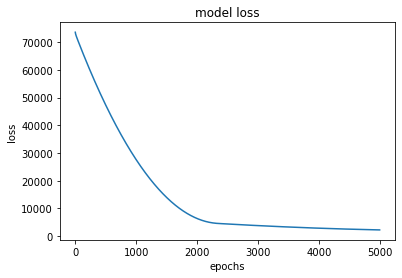

In [13]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

### predict

- 데이터를 이용해서 모델을 만들고 학습했으니 예측해보자
- 몸무게 100에 44살된 사람의 이 데이터에서의 Blood Fat은?

### 사용법은 sklearn과 비슷하다

In [15]:
model.predict(np.array([100, 44]).reshape(1,2))

array([[393.15265]], dtype=float32)

In [16]:
model.predict(np.array([60, 25]).reshape(1,2))

array([[232.21768]], dtype=float32)

### 가중치와 bias를 알고 싶다면

In [17]:
w_, b_ = model.get_weights()
w_, b_

(array([[2.1025562],
        [4.0438266]], dtype=float32),
 array([4.9686475], dtype=float32))

In [18]:
x = np.linspace(20, 100, 50).reshape(50, 1)
y = np.linspace(10, 70, 50).reshape(50, 1)

X = np.concatenate((x, y), axis=1)
Z = np.matmul(X, w_) + b_

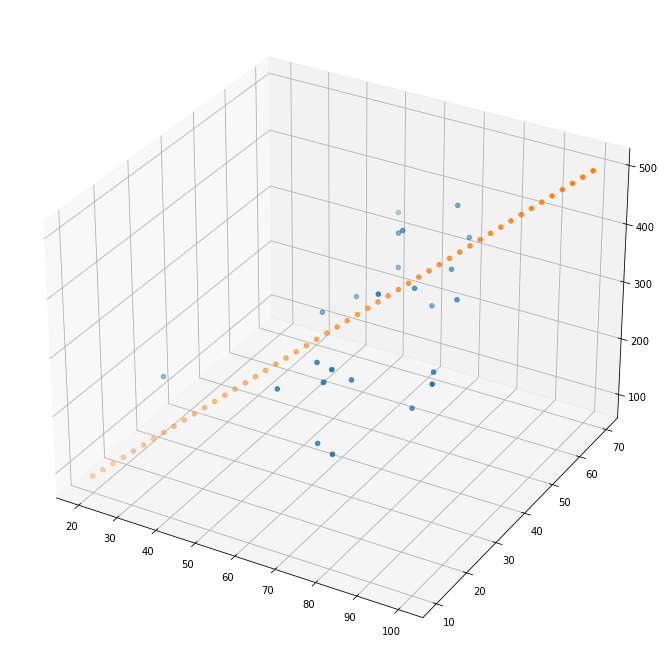

In [21]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z);